In [1]:
import os
import sys

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import region_formatter, path_utils

In [4]:
pathUtils = path_utils.PathUtils()

In [5]:
git_root_path = pathUtils.get_git_root(os.getcwd())
dataframes_path = "{}/dataframes".format(git_root_path)

In [6]:
%run ../dataframes/serd.ipynb
df_serd_count = pd.read_pickle("{}/df_serd_regions_agg.pkl".format(dataframes_path))

In [7]:
%run ../dataframes/regions_gdf.ipynb -i
regions_df = pd.read_pickle("{}/regions_df.pkl".format(dataframes_path))

In [8]:
%run ../dataframes/patients.ipynb -i
df_patients_regions_agg = pd.read_pickle("{}/df_patients_regions_agg.pkl".format(dataframes_path))

In [9]:
hsv_modified = cm.get_cmap('viridis', 256)
newcmp = ListedColormap(hsv_modified(np.linspace(0.7, 0.1, 256)))# show figure


/tmp/ipykernel_21658/2585086282.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  hsv_modified = cm.get_cmap('viridis', 256)


In [10]:
### Constants
OUTPUT_DIR = "output"
JOB = "SMS046"
JOB_TEXT = "Psichiatri"
YEAR = "2021"
# CMAP = (ListedColormap(['cyan', 'yellow', 'orange']))
CMAP = newcmp

In [11]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

In [12]:
REGION_COLOURS = {
    "Nord": "#211C6A", 
    "Centro": "#59B4C3",
    "Sud e Isole": "#74E291",
}

In [13]:
if not os.path.exists(OUTPUT_DIR):
    # Create the directory
    os.makedirs(OUTPUT_DIR)

# prepare dataframe

In [14]:
df = pd.read_csv(
    '../datasets/C_17_dataset_188_0_upFile.csv',
    delimiter=";",
    keep_default_na=False)

In [15]:
df

,ANNO DI RIFERIMENTO,CODICE REGIONE,DENOMINAZIONE REGIONE,CODICE AZIENDA,DENOMINAZIONE AZIENDA,CODICE SERD,DENOMINAZIONE SERD,CODICE QUALIFICA,DESCRIZIONE QUALIFICA,NUM. DIP. TEMPO PIENO,...,NUM. DIP. PART TIME OLTRE 50%,NUM. DIP. PART TIME OLTRE 50% U,NUM. DIP. PART TIME OLTRE 50% D,PERSONALE DIPENDENTE,PERSONALE DIPENDENTE U,PERSONALE DIPENDENTE D,ALTRO RAPPORTO,ALTRO RAPPORTO U,ALTRO RAPPORTO D,"TOTALE PERSONALE,,"
0,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,ASMP01,PERSONALE AMMINISTRATIVO,1,...,0,0,0,1,0,1,0,0,0,"1,,"
1,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SMS046,DI CUI PSICHIATRI,1,...,0,0,0,1,0,1,0,0,0,"1,,"
2,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SSMP01,MEDICO,2,...,0,0,0,2,0,2,0,0,0,"2,,"
3,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SSMP03,PERSONALE INFERMIERISTICO,3,...,0,0,0,4,0,4,0,0,0,"4,,"
4,2021,010,PIEMONTE,203,TO3,S01,Servizio per le dipendenze di VIA MARTIRI XXX...,SSMP05,EDUCATORE PROFESSIONALE,5,...,0,0,0,5,1,4,0,0,0,"5,,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,,,,,,,,,,,...,,,,,,,,,,",,"
2847,,,,,,,,,,,...,,,,,,,,,,",,"
2848,,,,,,,,,,,...,,,,,,,,,,",,"
2849,,,,,,,,,,,...,,,,,,,,,,",,"


In [16]:
df.loc[df["CODICE QUALIFICA"] == JOB, ]["DESCRIZIONE QUALIFICA"].unique()

array(['DI CUI PSICHIATRI'], dtype=object)

In [17]:
assert len(df.loc[df["CODICE QUALIFICA"] == JOB, ]["DESCRIZIONE QUALIFICA"].unique()) == 1, "more than one job description for code"

In [18]:
df["DENOMINAZIONE REGIONE"].unique()

array(['PIEMONTE             ', 'VALLE D`AOSTA        ',
       'LOMBARDIA            ', 'PROV. AUTON. BOLZANO ',
       'PROV. AUTON. TRENTO  ', 'VENETO               ',
       'FRIULI VENEZIA GIULIA', 'LIGURIA              ',
       'EMILIA ROMAGNA       ', 'TOSCANA              ',
       'UMBRIA               ', 'MARCHE               ',
       'LAZIO                ', 'ABRUZZO              ',
       'MOLISE               ', 'CAMPANIA             ',
       'PUGLIA               ', '', 'BASILICATA           ',
       'CALABRIA             ', 'SICILIA              ',
       'SARDEGNA             '], dtype=object)

In [19]:
formatter = region_formatter.RegionFormatter(df)

In [20]:
formatter.format("DENOMINAZIONE REGIONE")

In [21]:
df["DENOMINAZIONE REGIONE"].unique()

array(['piemonte', "valle d'aosta", 'lombardia', 'trentino alto adige',
       'veneto', 'friuli venezia giulia', 'liguria', 'emilia romagna',
       'toscana', 'umbria', 'marche', 'lazio', 'abruzzo', 'molise',
       'campania', 'puglia', '', 'basilicata', 'calabria', 'sicilia',
       'sardegna'], dtype=object)

In [22]:
df = df.rename(columns={
    "DENOMINAZIONE REGIONE": "reg_name",
    "TOTALE PERSONALE,,": "tot_personal"
})

In [23]:
df["tot_personal"] = df["tot_personal"].map(lambda x: x.replace(",", ""))

In [24]:
df["tot_personal"].unique()

array(['1', '2', '4', '5', '3', '7', '8', '6', '9', '12', '0', '13', '11',
       '14', '18', '34', '15', '10', '16', ''], dtype=object)

In [25]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [26]:
df["tot_personal"] = df["tot_personal"].astype(float)

In [27]:
df.columns

Index(['ANNO DI RIFERIMENTO', 'CODICE REGIONE', 'reg_name', 'CODICE AZIENDA',
       'DENOMINAZIONE AZIENDA', 'CODICE SERD', 'DENOMINAZIONE SERD',
       'CODICE QUALIFICA', 'DESCRIZIONE QUALIFICA', 'NUM. DIP. TEMPO PIENO',
       'NUM. DIP. TEMPO PIENO U', 'NUM. DIP. TEMPO PIENO D',
       'NUM. DIP. PART TIME FINO 50%', 'NUM. DIP. PART TIME FINO 50% U',
       'NUM. DIP. PART TIME FINO 50% D', 'NUM. DIP. PART TIME OLTRE 50%',
       'NUM. DIP. PART TIME OLTRE 50% U', 'NUM. DIP. PART TIME OLTRE 50% D',
       'PERSONALE DIPENDENTE', 'PERSONALE DIPENDENTE U',
       'PERSONALE DIPENDENTE D', 'ALTRO RAPPORTO', 'ALTRO RAPPORTO U',
       'ALTRO RAPPORTO D', 'tot_personal'],
      dtype='object')

In [28]:
df["reg_name"].unique()

array(['piemonte', "valle d'aosta", 'lombardia', 'trentino alto adige',
       'veneto', 'friuli venezia giulia', 'liguria', 'emilia romagna',
       'toscana', 'umbria', 'marche', 'lazio', 'abruzzo', 'molise',
       'campania', 'puglia', nan, 'basilicata', 'calabria', 'sicilia',
       'sardegna'], dtype=object)

# Prepare geodataframe

In [29]:
regions_df

,reg_istat_code_num,reg_istat_code,geometry,zone
reg_name,,,,
piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",Nord
valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",Nord
lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",Nord
trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",Nord
veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",Nord
friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",Nord
liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",Nord
emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",Centro
toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",Centro


# Data

In [30]:
df_job = df.loc[df["CODICE QUALIFICA"] == JOB, ["reg_name",  "tot_personal"] ]

In [31]:
df_job

,reg_name,tot_personal
1,piemonte,1.0
112,piemonte,2.0
119,piemonte,1.0
136,piemonte,1.0
142,piemonte,1.0
...,...,...
2790,sardegna,1.0
2802,sardegna,3.0
2809,sardegna,4.0
2817,sardegna,6.0


In [32]:
df_job = df_job.pivot_table(
    index='reg_name',
    aggfunc='sum',
    values='tot_personal'
)

In [33]:
df_job

,tot_personal
reg_name,
abruzzo,8.0
basilicata,4.0
calabria,2.0
campania,20.0
emilia romagna,42.0
friuli venezia giulia,1.0
lazio,18.0
liguria,28.0
lombardia,48.0


In [34]:
gdf_job = regions_df.join(df_job)

In [35]:
gdf_job = gdf_job.join(df_serd_count)

In [36]:
gdf_job = gdf_job.join(df_patients_regions_agg)

In [37]:
gdf_job["personal_avg"] = gdf_job["tot_personal"] / gdf_job["serd_count"] 

In [38]:
gdf_job["personal_per_user"] = gdf_job["users_sum"] / gdf_job["tot_personal"] 

In [39]:
gdf_job

,reg_istat_code_num,reg_istat_code,geometry,zone,tot_personal,serd_count,users_sum,personal_avg,personal_per_user
reg_name,,,,,,,,,
piemonte,1,01,"POLYGON ((7.13605 45.27996, 7.13601 45.28040, ...",Nord,17.0,25,11971.0,0.680000,704.176471
valle d'aosta,2,02,"POLYGON ((7.73455 45.92365, 7.73590 45.92744, ...",Nord,1.0,3,281.0,0.333333,281.000000
lombardia,3,03,"MULTIPOLYGON (((8.57964 45.75172, 8.57532 45.7...",Nord,48.0,22,23161.0,2.181818,482.520833
trentino alto adige,4,04,"POLYGON ((12.01396 46.55091, 12.01376 46.55077...",Nord,12.0,6,2134.0,2.000000,177.833333
veneto,5,05,"POLYGON ((10.63538 45.53543, 10.63228 45.56846...",Nord,23.0,16,11105.0,1.437500,482.826087
friuli venezia giulia,6,06,"MULTIPOLYGON (((13.51691 46.38301, 13.51750 46...",Nord,1.0,13,1983.0,0.076923,1983.000000
liguria,7,07,"MULTIPOLYGON (((7.55166 43.89429, 7.56264 43.9...",Nord,28.0,6,3969.0,4.666667,141.750000
emilia romagna,8,08,"MULTIPOLYGON (((9.33258 44.73504, 9.33167 44.7...",Centro,42.0,12,9139.0,3.500000,217.595238
toscana,9,09,"MULTIPOLYGON (((9.89786 44.16359, 9.89451 44.1...",Centro,30.0,39,10265.0,0.769231,342.166667


In [40]:
plot_title = "Totale Personale {} SerD per regione - Anno {}".format(
    JOB_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

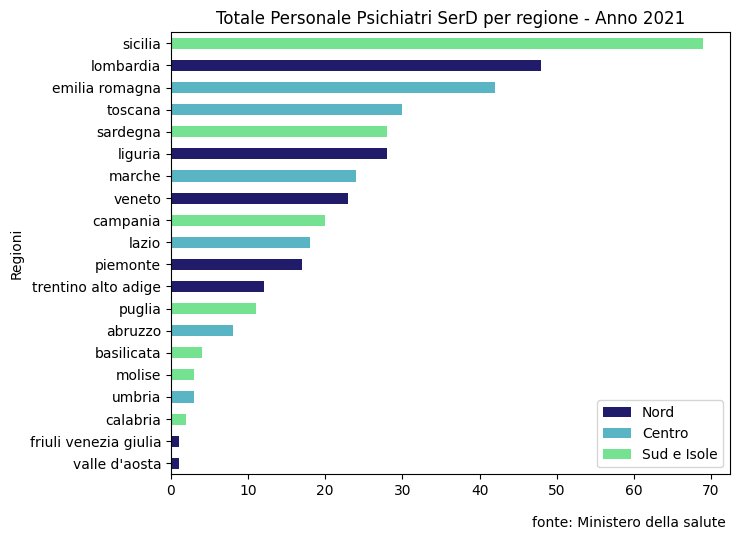

In [41]:
gdf_job_barplot = gdf_job.sort_values(by=['tot_personal']).plot.barh(
    y="tot_personal",
    ylabel='Regioni',
    title=plot_title,
    color=gdf_job.sort_values(by=['tot_personal'])['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [42]:
gdf_job_barplot.get_figure().savefig('output/gdf_job_barplot.png')

In [43]:
plot_title = "Totale personale {} SerD per regione - Anno {}".format(
    JOB_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

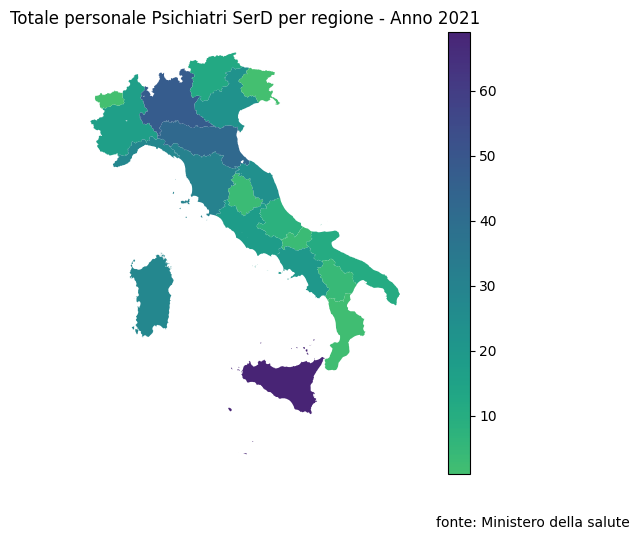

In [44]:
plot_job = gdf_job.plot(
    column="tot_personal",
    legend=True,
    cmap=CMAP
);
plt.title(plot_title)
plot_job.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [45]:
plot_job.get_figure().savefig('output/plot_job.png')

In [46]:
plot_title = "Media personale {} per SerD per regione - Anno {}".format(
    JOB_TEXT,
    YEAR
)

Text(260, -30, 'fonte: Ministero della salute')

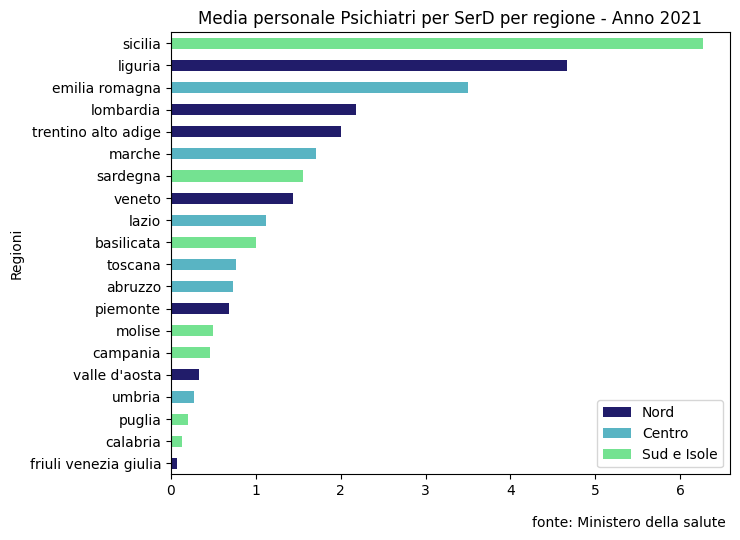

In [47]:
gdf_job_barplot_avg = gdf_job.sort_values(by=['personal_avg']).plot.barh(
    y="personal_avg",
    ylabel='Regioni',
    title=plot_title,
    color=gdf_job.sort_values(by=['personal_avg'])['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [48]:
gdf_job_barplot_avg.get_figure().savefig('output/gdf_job_barplot_avg.png')

Text(260, -30, 'fonte: Ministero della salute')

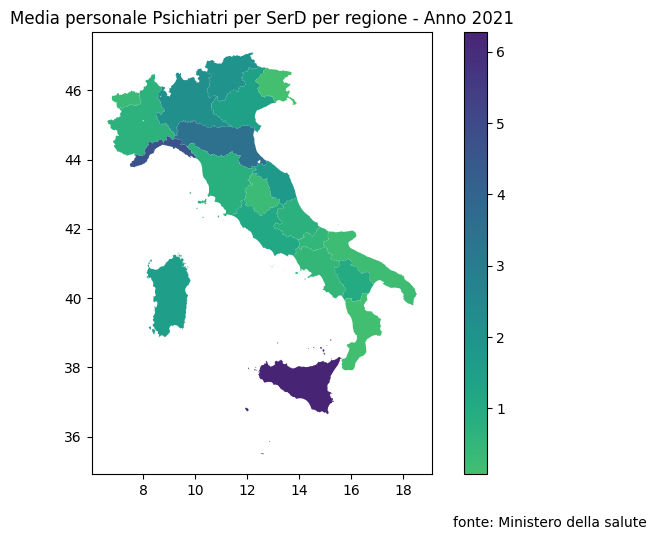

In [49]:
plot_job_avg = gdf_job.plot(
    column="personal_avg",
    legend=True,
    cmap=CMAP
);
plt.title(plot_title)
plot_job.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [50]:
plot_job_avg.get_figure().savefig('output/plot_job_avg.png')

Text(260, -30, 'fonte: Ministero della salute')

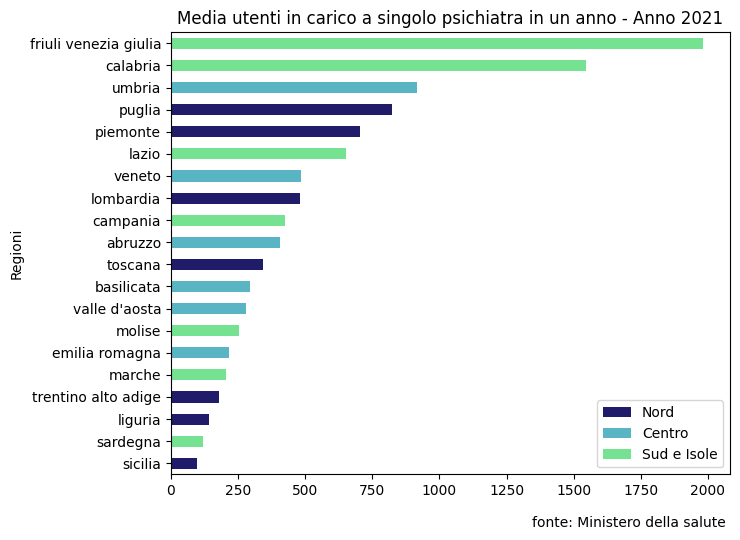

In [51]:
gdf_personal_users_barplot = gdf_job.sort_values(by=['personal_per_user']).plot.barh(
    y="personal_per_user",
    ylabel='Regioni',
    title="Media utenti in carico a singolo psichiatra in un anno - Anno 2021",
    color=gdf_job.sort_values(by=['serd_count'])['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [52]:
gdf_personal_users_barplot.get_figure().savefig('output/gdf_personal_users_barplot.png')

Text(260, -30, 'fonte: Ministero della salute')

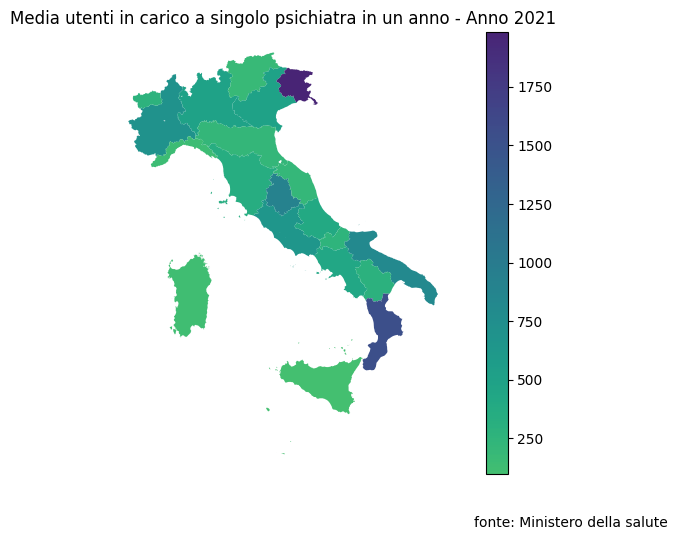

In [53]:
plot_personal_users = gdf_job.plot(
    column="personal_per_user",
    legend=True,
    cmap=CMAP
)
plt.title("Media utenti in carico a singolo psichiatra in un anno - Anno 2021")
plot_personal_users.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')

In [54]:
plot_personal_users.get_figure().savefig('output/plot_personal_users.png')